In [1]:
import tools
import numpy as np

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Histograms

`matplotlib` doesn't do well with overlapping histograms, as the bins don't line up by default. This functions is addresses that.

In [3]:
x1 = stats.norm(0,1).rvs(100000)
x2 = stats.norm(3,2).rvs(50000)
x3 = stats.norm(5,1.5).rvs(50000)

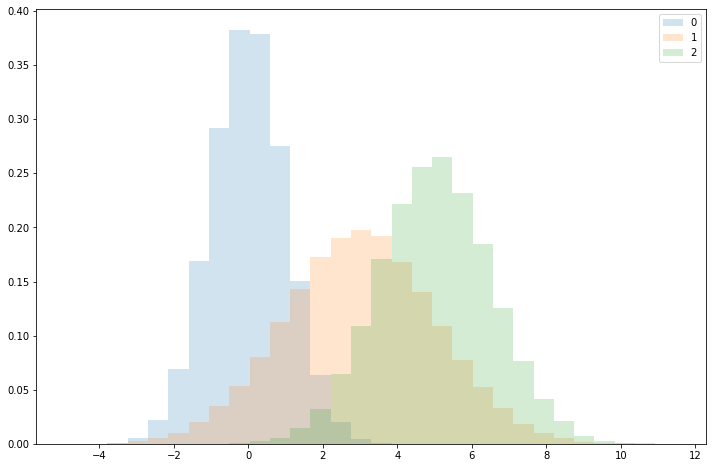

In [4]:
tools.multihist([x1, x2, x3], density=True, bins=30, xmin=None, xmax=None)

There are two main ways to call it. In the above case we pass a list of arrays, one array for each histogram. In the other approach we pass a second argument representing the label.

In [5]:
x = np.concatenate([x1, x2, x3])
y = np.array((['N(0, 1)']*100000 + ['N(3, 2)']*50000 + ['N(5, 1.5)']*50000))

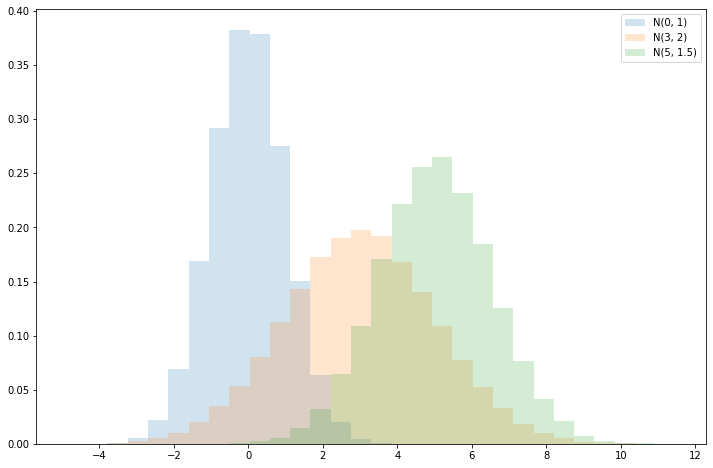

In [6]:
tools.multihist(x, y, density=True, bins=30, xmin=None, xmax=None)

## Confusion Matrices

This is a visualization of confusion matrices using the size of a sub-square to indicate the value in a box.

We're using a poor model as an example.

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
data = load_digits()
X = data.data
y = data.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/jackbennetto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

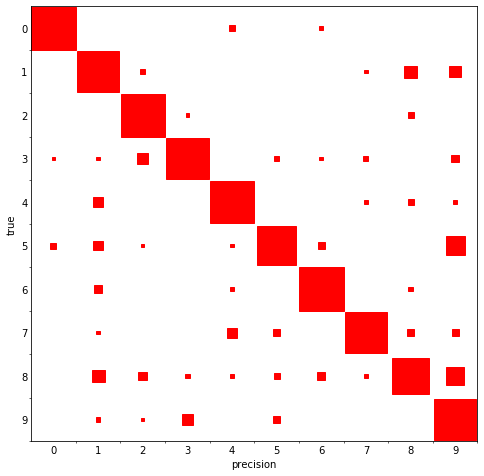

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
tools.plot_confusion_matrix(ax,
                            y_test, model.predict(X_test),
                            area=True, grid=False, color='r', transpose=True)

The confusion matrix has three different options for how to normalize the size of the squares. In the default (`normalization='maximum'`), the size of the squares is proportional to the number if samples among all the possible combinations, scaled so that the square corresponding to the largest number fills an entire space in the grid.

For `'precision'` or `'prediction`', the numbers are scaled separately within each column, so total sizes of all the squares for a single prediction would fill a grid space. In this case, the size of the square (relative to the grid space) represents the precision of for that combination.

For `'recall'` or `'true`', the numbers are scaled separately within each row, so total sizes of all the squares for a single true value would fill a grid space. In this case, the size of the square (relative to the grid space) represents the recall of for that combination.

In [12]:
y_true = [0,0,0,0,1,1,1,1,1,2,2,2]
y_pred = [0,0,0,1,1,1,1,0,0,2,1,0]

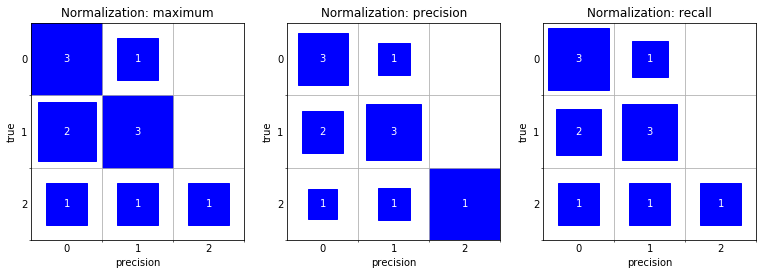

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4))

for ax, normalization in zip(axs, ['maximum','precision', 'recall']):
    tools.plot_confusion_matrix(ax, y_true, y_pred,
                                grid=True,
                                counts=True,
                                normalization=normalization,
                                transpose=True) 
    ax.set_title(f"Normalization: {normalization}")

By default the confusion matrices have precision along the horizontal axis and the true values along the vertical (transposed from the `sklearn` standard). That can be switched with `transpose=False`.

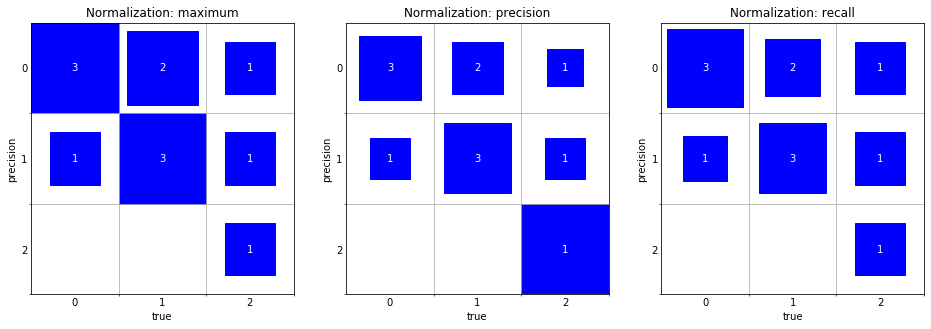

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

for ax, normalization in zip(axs, ['maximum','precision', 'recall']):
    tools.plot_confusion_matrix(ax, y_true, y_pred,
                                grid=True,
                                counts=True,
                                normalization=normalization,
                                transpose=False) 
    ax.set_title(f"Normalization: {normalization}")


## Diagonal lines

`matplotlib` has functions for vertical and horizontal lines that don't affect the existing limits (`axvline` and `axhline`), but drawing a diagonal lines requires some work in checking these first. The `axdline` function takes care of that.

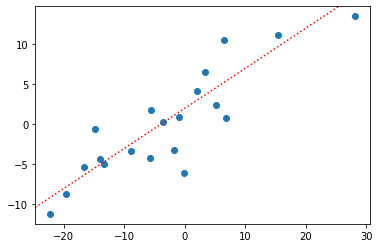

In [15]:
x = stats.norm(-5, 10).rvs(20)
y = 2 + 0.5 * x + stats.norm(0, 3).rvs(20)

fig, ax = plt.subplots()
ax.scatter(x, y)
tools.axdline(ax, 0.5, 2, c='red', ls=':')